In [18]:
#import pandas & upload file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
df=files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [19]:
#get data
df=pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [21]:
df=df[['App','Category','Type','Content Rating','Last Updated']]
df.head()

,App,Category,Type,Content Rating,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,7-Jan-18
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,15-Jan-18
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,Free,Everyone,1-Aug-18
3,Sketch - Draw & Paint,ART_AND_DESIGN,Free,Teen,8-Jun-18
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,Free,Everyone,20-Jun-18


In [22]:
ctgr=df.groupby('Category').size()
ctgr

Category
ART_AND_DESIGN           65
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     231
BUSINESS                460
COMICS                   60
COMMUNICATION           387
DATING                  234
EDUCATION               156
ENTERTAINMENT           149
EVENTS                   64
FAMILY                 1972
FINANCE                 366
FOOD_AND_DRINK          127
GAME                   1144
HEALTH_AND_FITNESS      341
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
LIFESTYLE               382
MAPS_AND_NAVIGATION     137
MEDICAL                 463
NEWS_AND_MAGAZINES      283
PARENTING                60
PERSONALIZATION         392
PHOTOGRAPHY             335
PRODUCTIVITY            424
SHOPPING                260
SOCIAL                  295
SPORTS                  384
TOOLS                   843
TRAVEL_AND_LOCAL        258
VIDEO_PLAYERS           175
WEATHER                  82
dtype: int64

<Axes: ylabel='Category'>

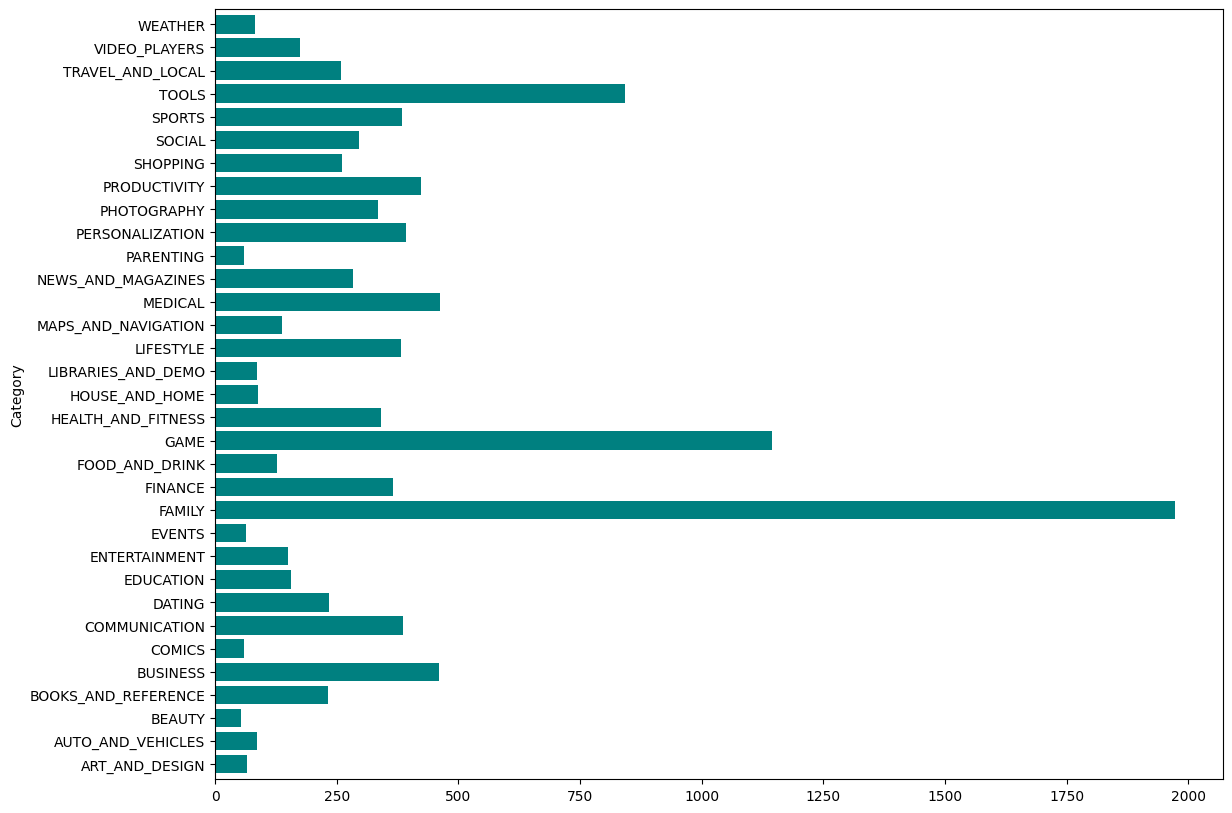

In [23]:
ctgr.plot(kind='barh',color='teal',width=0.8,figsize=(13,10))

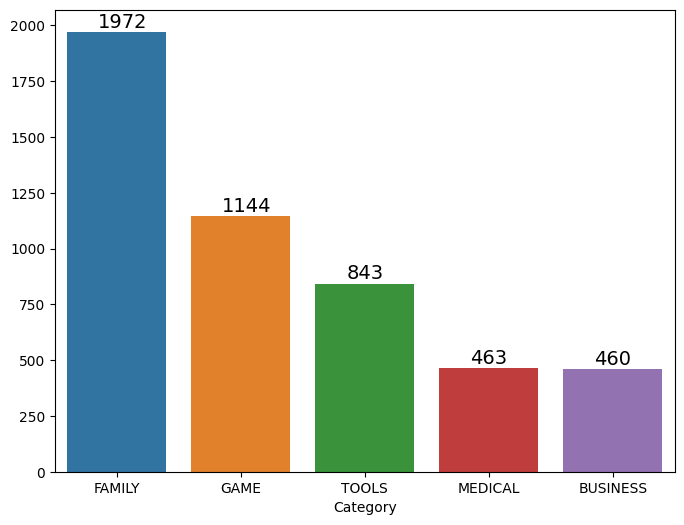

In [24]:
ctgr.sort_values(ascending=False,inplace=True)
ctgr=ctgr.head()
fig, ax=plt.subplots(figsize=(8,6))
index=ctgr.fillna('NaN').index[0:10]
count=ctgr.fillna('NaN')
sns.barplot(ax=ax,x=index,y=count,order=index)
for index,count in enumerate(count):
  ax.text(x=index-0.15,y=count+20,s=f'{count}',fontdict=dict(fontsize=14))
plt.show()

In [25]:
type=df.groupby('Type').size()
type

Type
Free    10040
Paid      800
dtype: int64

<Axes: >

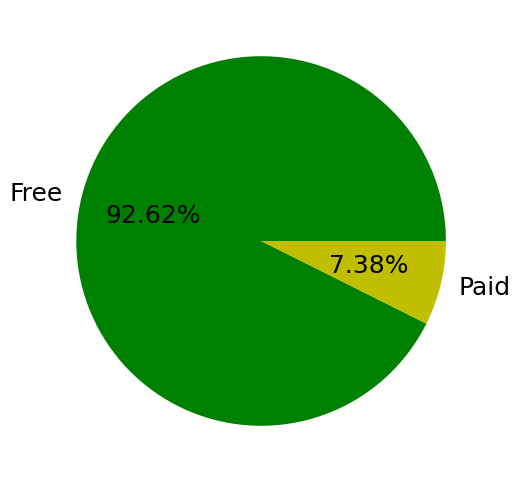

In [26]:
type.plot(kind='pie',ylabel='',colors=['g','y'],autopct='%2.2f%%',fontsize=18,figsize=(6,6))

In [27]:
cntn_rat=df.groupby('Content Rating').size().sort_values(ascending=False,inplace=True)
cntn_rat=cntn_rat

In [28]:
df['Last Updated'].dtype

dtype('O')

In [29]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])
updt=df[['App','Last Updated']]
updt

,App,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,2018-01-07
1,Coloring book moana,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",2018-08-01
3,Sketch - Draw & Paint,2018-06-08
4,Pixel Draw - Number Art Coloring Book,2018-06-20
...,...,...
10835,Sya9a Maroc - FR,2017-07-25
10836,Fr. Mike Schmitz Audio Teachings,2018-07-06
10837,Parkinson Exercices FR,2017-01-20
10838,The SCP Foundation DB fr nn5n,2015-01-19


In [30]:
year=updt['Last Updated'].dt.strftime('%Y')
updt_year=updt.groupby(year).size()
updt_year

Last Updated
2010       1
2011      15
2012      26
2013     110
2014     209
2015     459
2016     804
2017    1867
2018    7349
dtype: int64

<Axes: xlabel='Last Updated'>

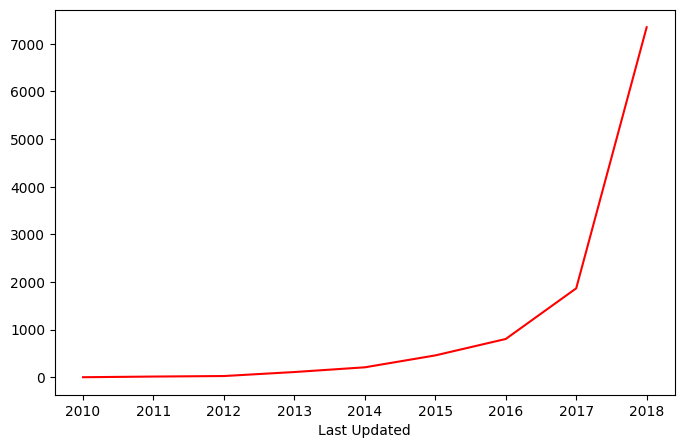

In [31]:
updt_year.plot(figsize=(8,5),color='r')